## Loading the Datasets

In [408]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
import os
import sys

from importlib import reload
import src.utils.utils
reload(src.utils.utils)
from src.utils.utils import top_n_by_interval

In [111]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [112]:
## Load the data

with open(pickle_folder + 'movies.p', 'rb') as f:
    movie_data = pickle.load(f)

with open(pickle_folder + 'characters.p', 'rb') as f:
    character_data = pickle.load(f)

In [113]:
movie_data

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages_(Freebase_ID:name_tuples),Movie_countries_(Freebase_ID:name_tuples),Movie_genres_(Freebase_ID:name_tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [98]:
character_data

,Wikipedia movie ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [212]:
# Copy the data to not lose the original one and drop the rows with missing values in the 'Movie release date' column
# since we are studying the period 1910-2016

with open(pickle_folder + 'movies_averageRating.p', 'rb') as f:
    md = pickle.load(f)

with open(pickle_folder + 'characters_date.p', 'rb') as f:
    cd = pickle.load(f)

# 1. Data Analysis

## 1.1 Analysis of the Number of Movies

#### 1.1.1  Number of movies per Year

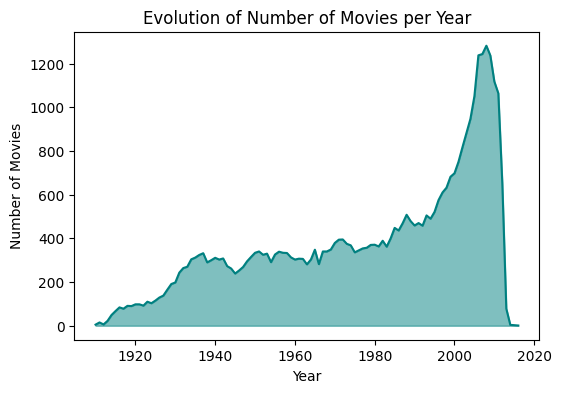

In [213]:
md_number = md.copy().dropna(subset=['Movie_release_date'])
movies_per_year = md_number['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(movies_per_year.index, movies_per_year.values, linestyle='-', color='teal')
plt.fill_between(movies_per_year.index, movies_per_year.values, color='teal', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Evolution of Number of Movies per Year")
plt.show()

### 1.1.2 Number of Movies per Country

In [253]:
with open(pickle_folder + 'movies_countries_ratings.p', 'rb') as f:
    md_countries = pickle.load(f)

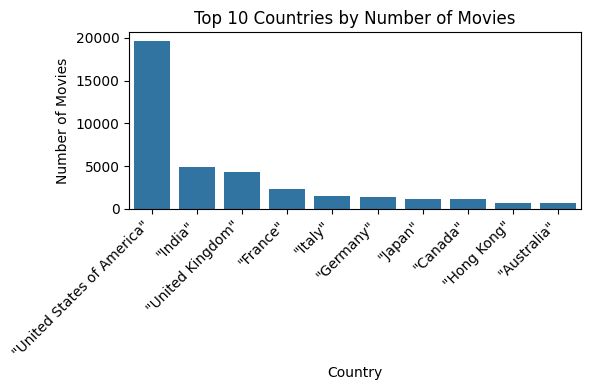

In [254]:
country_counts = md_countries['Countries'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.title("Top 10 Countries by Number of Movies")
plt.tight_layout()
plt.show()

### 1.1.3 Number of Movies per Genre

In [319]:
with open(pickle_folder + 'movies_genres_ratings.p', 'rb') as f:
    md_Genres = pickle.load(f)

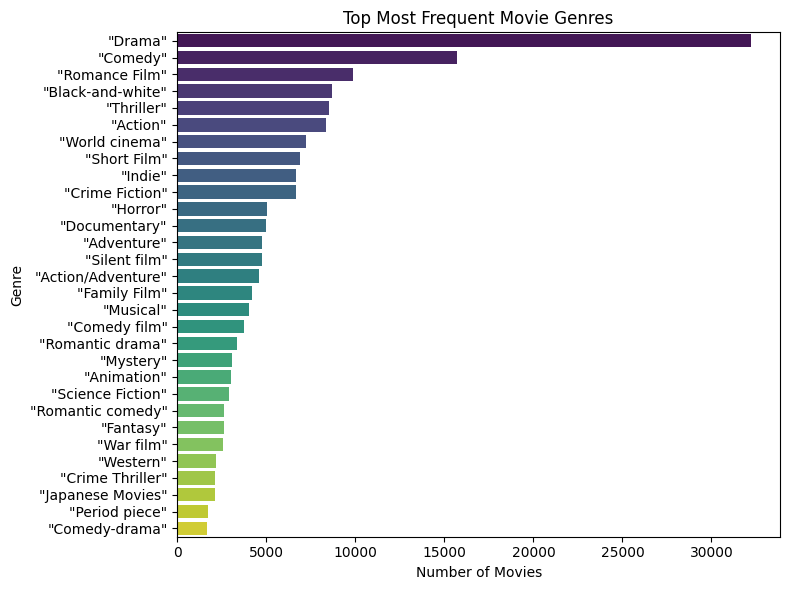

In [324]:
# Select the top 30 genres
top_genres = md_Genres.value_counts('Genres').head(30)

plt.figure(figsize=(8, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis",hue=top_genres.index)
plt.title('Top Most Frequent Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#### We want to analyze the 10 most frequent Genres in Intervals of 20 Years 

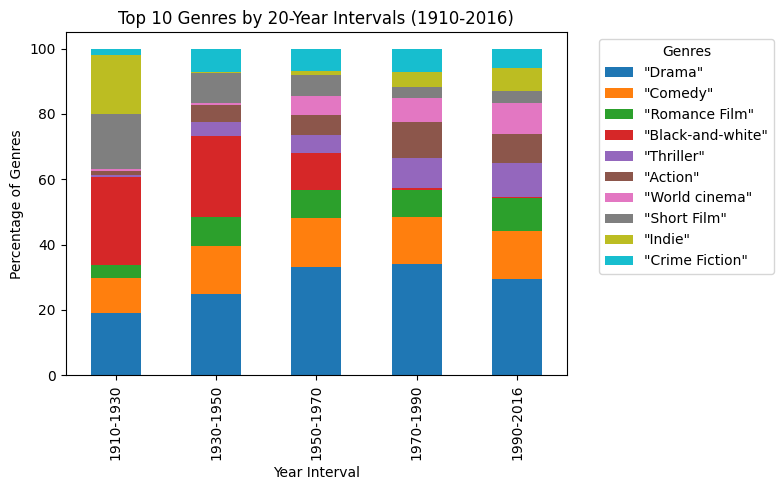

In [410]:
ax = top_n_by_interval('Genres',md_Genres)

## 1.2 Analysis of the Box Office Revenue

### 1.2.1 Box Office Revenue per Year

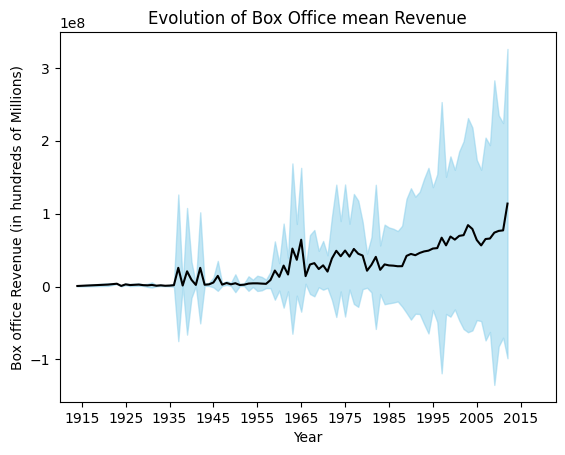

In [219]:
## Calculate the average and standard deviation of the box office revenue per year

stats_per_year = md_number.groupby(by='Year')['Movie_box_office_revenue'].agg(
    average='mean',
    std_dev='std'
).dropna()

ax = stats_per_year.average.plot(xlim=(1910,2023),xticks=range(1895,2023,10),title='Evolution of Box Office mean Revenue',ylabel='Box office Revenue (in hundreds of Millions)',color='black')
plt.fill_between(stats_per_year.index, stats_per_year.average - stats_per_year.std_dev,
                 stats_per_year.average + stats_per_year.std_dev, alpha = 0.5, color = 'skyblue')

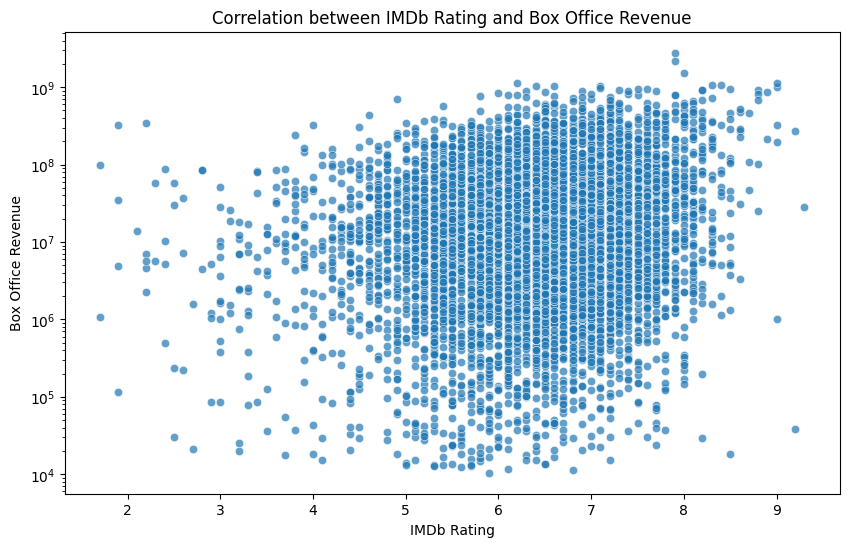

In [220]:
#A verifier si C vraiment Pertinent de le faire sous cette former parce que j'ai pas trop 
# l'impression qu'on comprend la correlation entre les deux trucs là

#correlation between rating and revenue
plot_data = md.copy().dropna(subset=['averageRating', 'numVotes', 'Movie_box_office_revenue'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='averageRating', y='Movie_box_office_revenue', alpha=0.7)
plt.title('Correlation between IMDb Rating and Box Office Revenue')
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office Revenue')
plt.yscale('log') 
plt.show()

### 1.2.2 Box Office Revenue and Average Rating per Country

In [350]:
with open(pickle_folder + 'movies_countries_ratings.p', 'rb') as f:
    movies_countries = pickle.load(f)

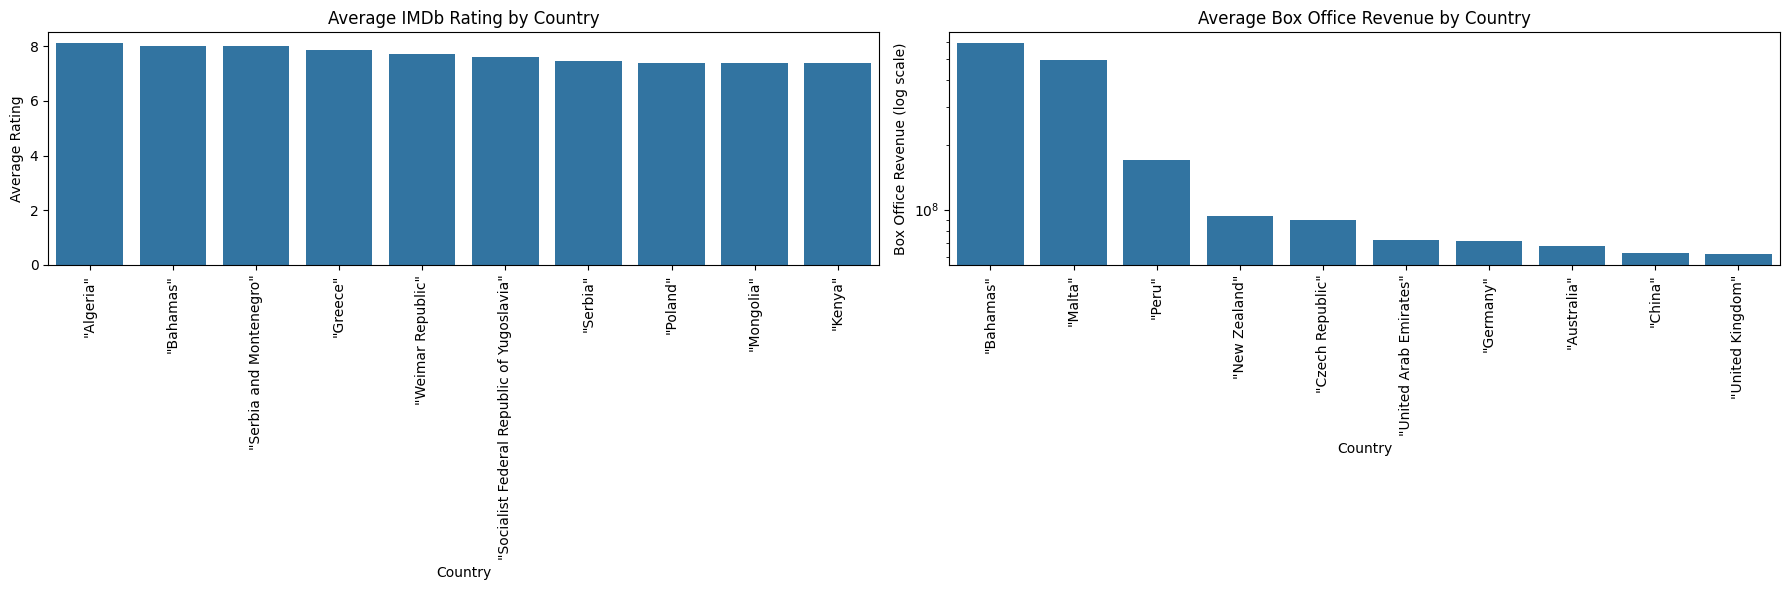

In [351]:
md_countries = movies_countries.dropna(subset=['Movie_box_office_revenue'])

country_revenue = md_countries.groupby('Countries').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

# Plot 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

country_revenue = country_revenue.sort_values(by='averageRating', ascending=False)

# Average imdb rating by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['averageRating'], ax=axs[0])
axs[0].set_title('Average IMDb Rating by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

country_revenue = country_revenue.sort_values(by='Movie_box_office_revenue', ascending=False).head(10)

# Average box office revenue by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['Movie_box_office_revenue'], ax=axs[1])
axs[1].set_title('Average Box Office Revenue by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

### RESULTAT DOUTEUX ALGERIE EN PREMIER DANS LES RATINGS ????

### We want to analyze the top 10 most frequent Countries in interval of 20 years

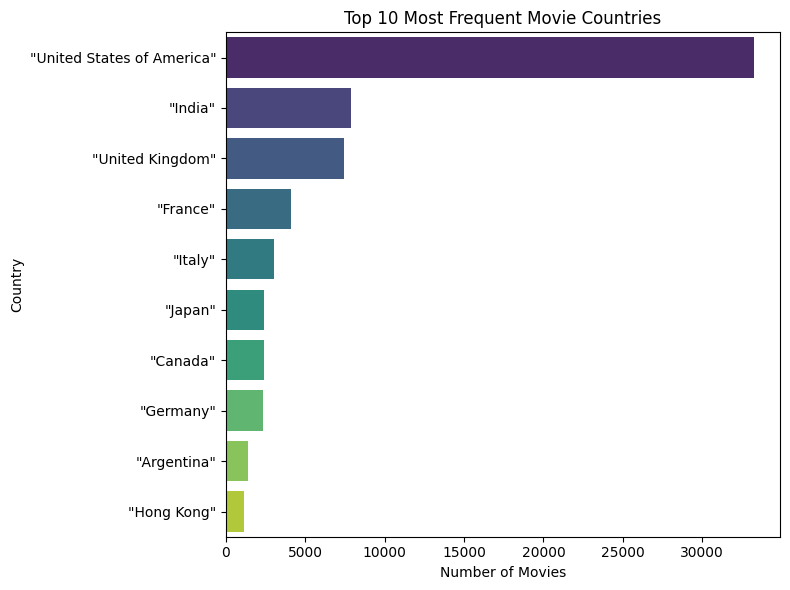

In [356]:
top_countries = movies_countries.value_counts('Countries').head(10)

plt.figure(figsize=(8, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis",hue=top_countries.index)
plt.title('Top 10 Most Frequent Movie Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

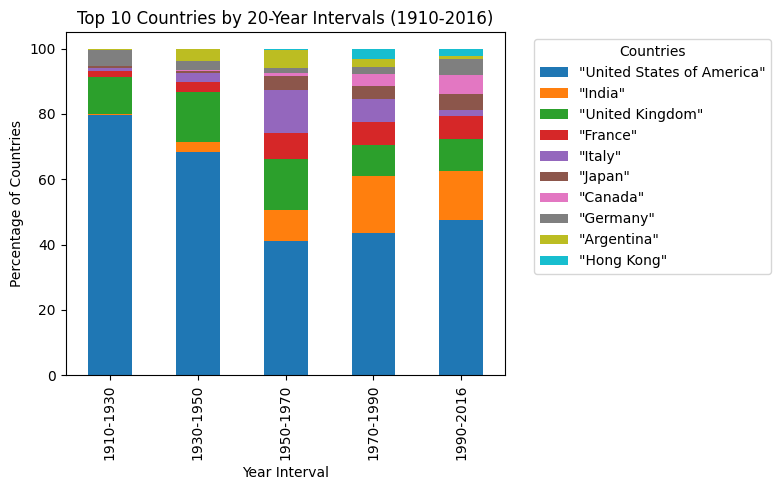

In [412]:
ax = top_n_by_interval('Countries',movies_countries)

### 1.2.2 Box Office Revenue and Average Rating per Genre

In [ ]:
with open(pickle_folder + 'movies_Genres_ratings.p', 'rb') as f:
    md_Genres = pickle.load(f)

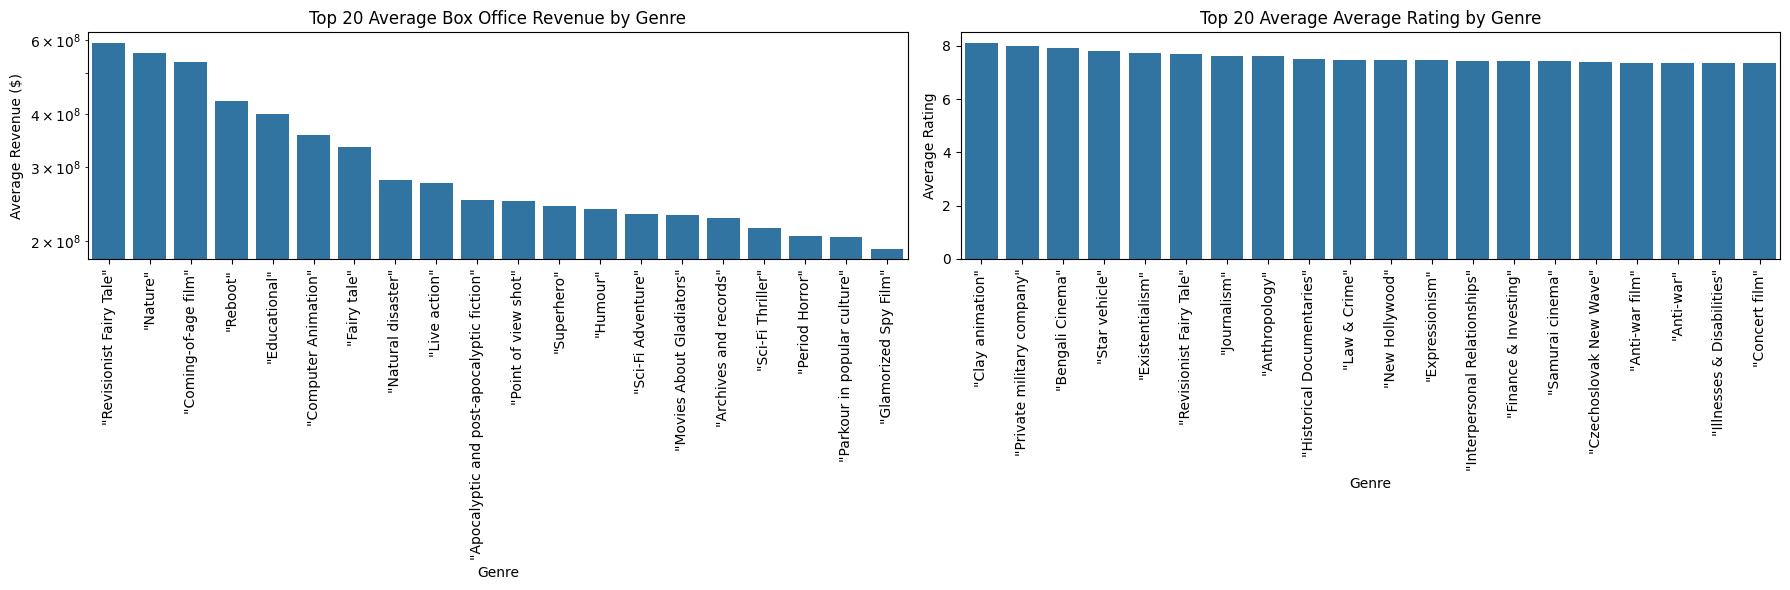

In [264]:
genre_stats = md_Genres.groupby('Genres').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
}).sort_values(by='Movie_box_office_revenue', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Average imdb rating by Language
sns.barplot(x=genre_stats.head(20).index, y=genre_stats.head(20)['Movie_box_office_revenue'], ax=axs[0])
axs[0].set_title("Top 20 Average Box Office Revenue by Genre")
axs[0].set_xlabel("Genre")
axs[0].set_ylabel("Average Revenue ($)")
axs[0].set_yscale('log')
axs[0].tick_params(axis='x', rotation=90)  

genre_stats = genre_stats.sort_values(by='averageRating', ascending=False)

# Average box office revenue by Language
sns.barplot(x=genre_stats.head(20).index, y=genre_stats.head(20)['averageRating'], ax=axs[1])
axs[1].set_title("Top 20 Average Average Rating by Genre")
axs[1].set_xlabel("Genre")
axs[1].set_ylabel("Average Rating")
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

### 1.2.3 Box Office Revenue per Release Season

In [380]:
with open(pickle_folder + 'movies_season_ratings.p', 'rb') as f:
    movies_season = pickle.load(f)

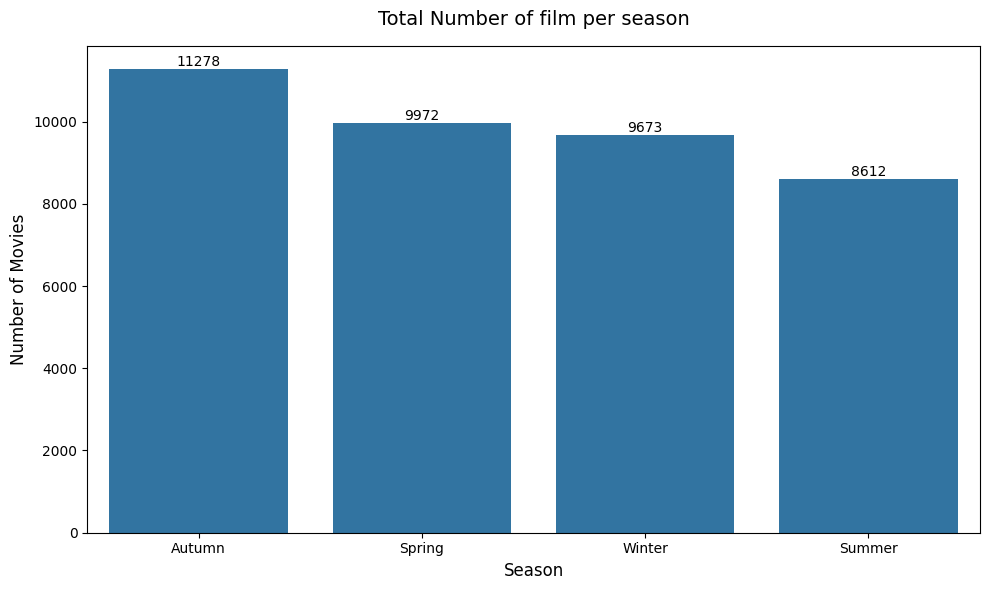

In [381]:
plt.figure(figsize=(10, 6))

yearly_counts = movies_season.value_counts('release_season')

ax = sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Total Number of film per season', fontsize=14, pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

for i, v in enumerate(yearly_counts.values):
    ax.text(i, v + 1, str(v), 
            ha='center', 
            va='bottom',
            fontsize=10)

plt.tight_layout()

plt.show()

Average Box Office Revenue by Release Season:
release_season
Autumn    4.571096e+07
Winter    4.864030e+07
Spring    5.923325e+07
Summer    7.658961e+07
Name: mean, dtype: float64


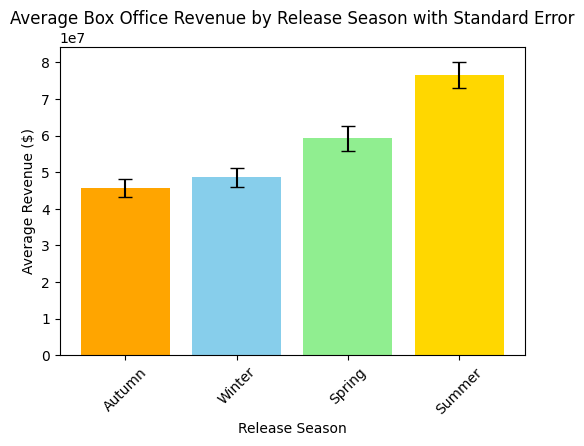

In [382]:
release_season_stats = movies_season.groupby('release_season')['Movie_box_office_revenue'].agg(['mean', 'sem']).sort_values(by='mean')
# Print the average revenues by season
print("Average Box Office Revenue by Release Season:")
print(release_season_stats['mean'])

# Plot the average revenues with standard error bars
plt.figure(figsize=(6, 4))
plt.bar(release_season_stats.index, release_season_stats['mean'], yerr=release_season_stats['sem'], color=['orange', 'skyblue', 'lightgreen', 'gold'], capsize=5)
plt.title('Average Box Office Revenue by Release Season with Standard Error')
plt.xlabel('Release Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.show()

Text(58.347222222222214, 0.5, 'Proportion of each season')

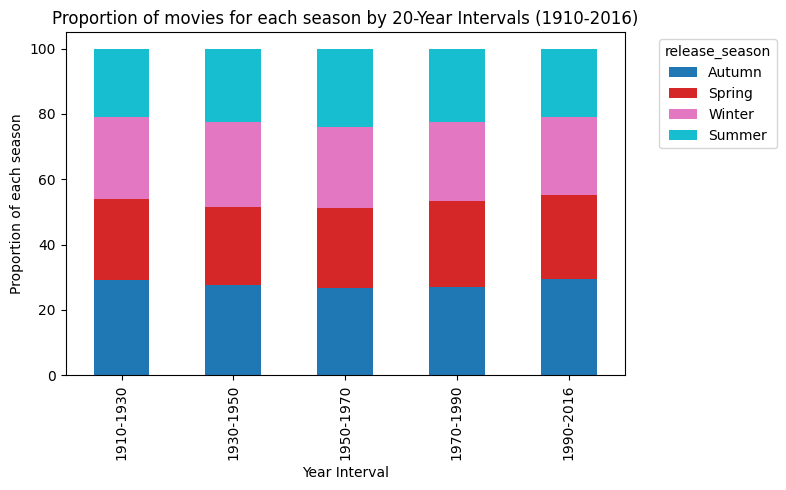

In [415]:
ax = top_n_by_interval('release_season',movies_season,n=4)
ax.set_title("Proportion of movies for each season by 20-Year Intervals (1910-2016)")
ax.set_ylabel("Proportion of each season")

# We observe that since the inception of cinema, almost the same proportion of movies are 
# released every season, it is very balanced. That contrasts a lot with the fact that Summer is the most succesful season 
# at the box-office

## 1.3. Analysis of the Number of Translations

In [207]:
with open(pickle_folder + 'movies_languages_exploded_ratings.p', 'rb') as f:
    movies_languages = pickle.load(f)

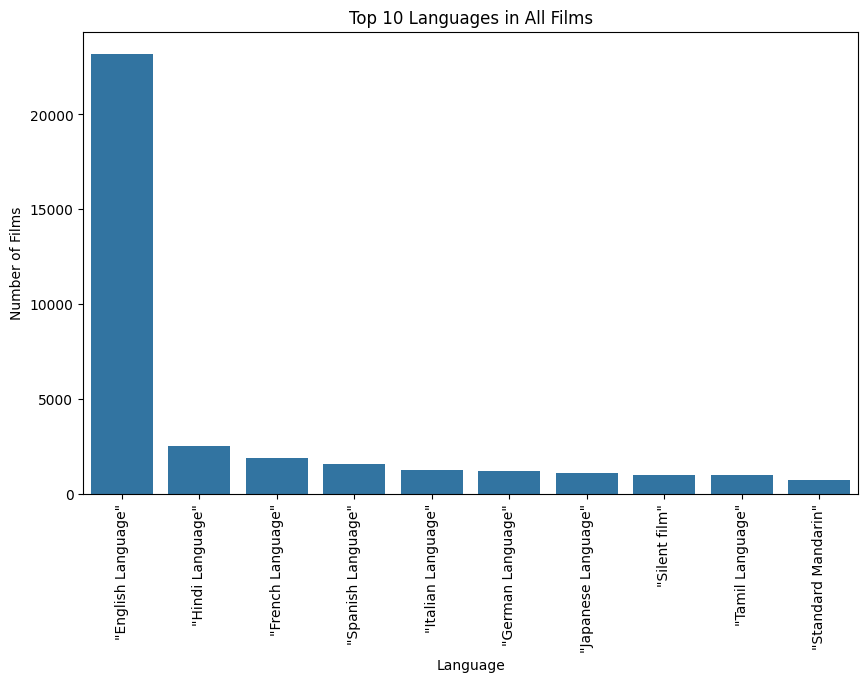

In [218]:
# top 10 languages 
top_languages = movies_languages['Language'].value_counts().head(10)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Languages in All Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)  
plt.show()

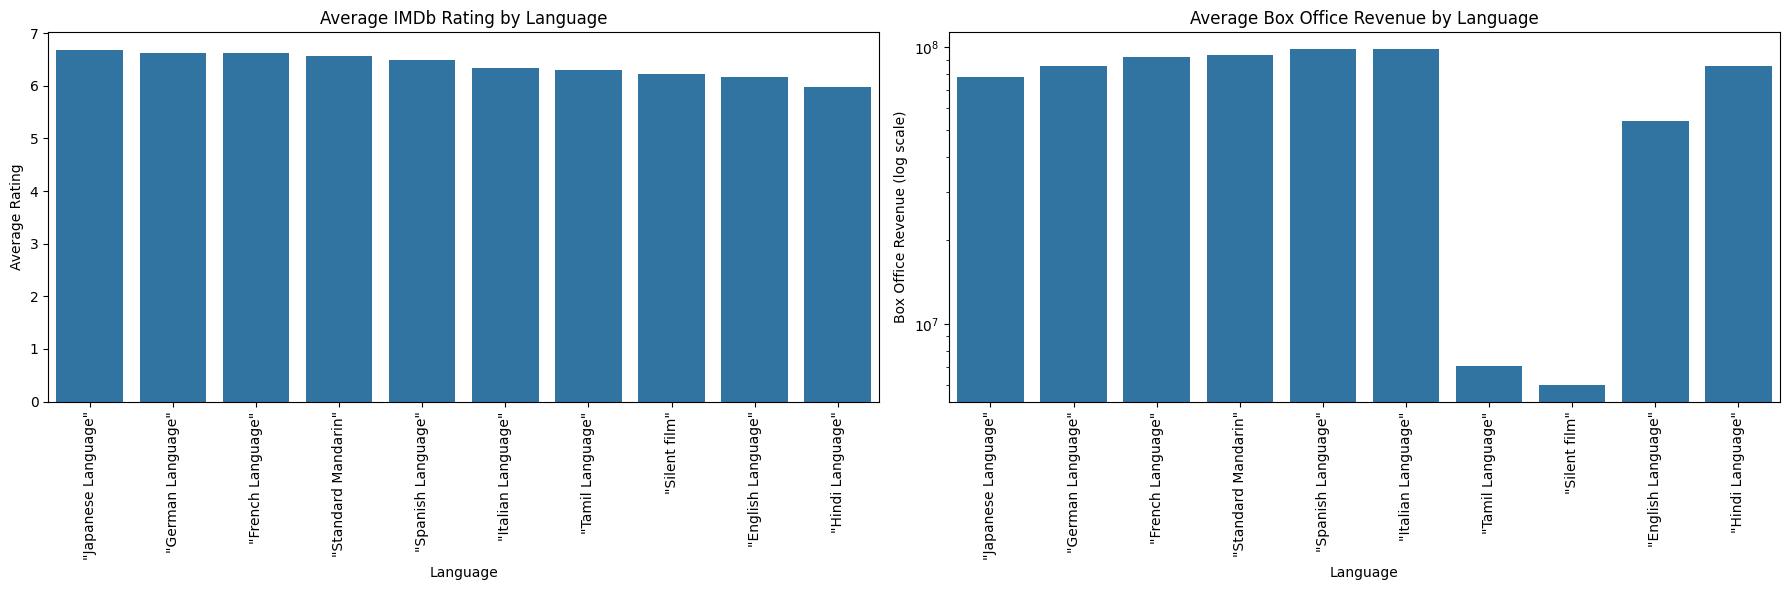

In [210]:
top_language_data = movies_languages[movies_languages['Language'].isin(top_languages.index)]

language_success = top_language_data.groupby('Language').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
}).sort_values(by='averageRating', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Average imdb rating by Language
sns.barplot(x=language_success.index, y=language_success['averageRating'], ax=axs[0])
axs[0].set_title('Average IMDb Rating by Language')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

# Average box office revenue by Language
sns.barplot(x=language_success.index, y=language_success['Movie_box_office_revenue'], ax=axs[1])
axs[1].set_title('Average Box Office Revenue by Language')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

## 1.4. Analysis of the Gender of Actors

In [ ]:
# Copy the data to not lose the original one and drop the rows with missing values in the 'Movie release date' column
# since we are studying the period 1910-2016

md = movie_data.copy().dropna(subset=['Movie release date'])
cd = character_data.copy().dropna(subset=['Movie release date'])

md['Year'] = md['Movie release date'].str[:4]
md['Year'] = md['Year'].astype(int)
cd['Year'] = cd['Movie release date'].str[:4]
cd['Year'] = cd['Year'].astype(int)

md = md.query(" 2016 > Year > 1910")
cd = cd.query(" 2016 > Year > 1910")